<a href="https://colab.research.google.com/github/vaishnavi17398/FeynnLabsInternship/blob/main/diabetic_segmentation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("diabetes.csv")

In [7]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Outcome', axis=1))


In [8]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [9]:
# Add cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

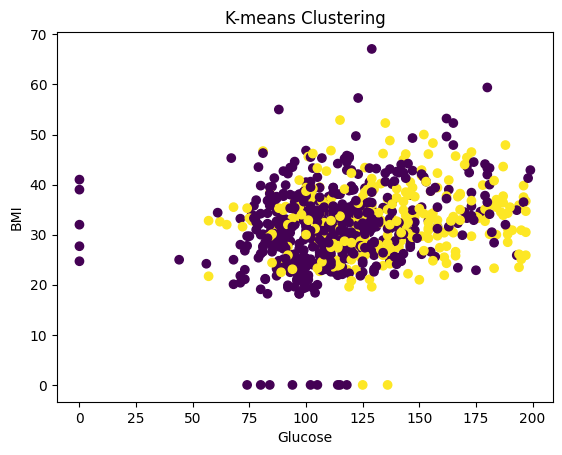

In [10]:
# Visualize the clusters
plt.scatter(df['Glucose'], df['BMI'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('K-means Clustering')
plt.show()

In [12]:
# Print cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[-0.52576585 -0.23780073 -0.22308335  0.07839954  0.01382013 -0.06497415
  -0.01732699 -0.57562537]
 [ 0.95874949  0.43363662  0.40679905 -0.14296386 -0.02520141  0.11848227
   0.03159628  1.04966979]]


The cluster centers represent the centroids of the clusters formed by the K-means algorithm. Each row in the cluster centers array corresponds to a cluster, and each column represents the mean value of a feature within that cluster.

Let's break down the cluster centers:

Cluster 1:

Pregnancies: -0.52576585
Glucose: -0.23780073
BloodPressure: -0.22308335
SkinThickness: 0.07839954
Insulin: 0.01382013
BMI: -0.06497415
DiabetesPedigreeFunction: -0.01732699
Age: -0.57562537
Cluster 2:

Pregnancies: 0.95874949
Glucose: 0.43363662
BloodPressure: 0.40679905
SkinThickness: -0.14296386
Insulin: -0.02520141
BMI: 0.11848227
DiabetesPedigreeFunction: 0.03159628
Age: 1.04966979
Explanation:

Cluster 1:

This cluster has negative values for most features, indicating that individuals in this cluster tend to have lower-than-average values for pregnancies, glucose levels, blood pressure, BMI, diabetes pedigree function, and age.
The positive value for skin thickness suggests that individuals in this cluster may have slightly thicker skin compared to the overall dataset, but this might not be a significant feature for differentiating this cluster from others.

Cluster 2:

This cluster has positive values for most features, indicating that individuals in this cluster tend to have higher-than-average values for pregnancies, glucose levels, blood pressure, BMI, diabetes pedigree function, and age.
The negative value for skin thickness suggests that individuals in this cluster may have slightly thinner skin compared to the overall dataset, but again, this might not be a significant feature for differentiating this cluster from others.
Conclusion:

Based on the cluster centers, we can conclude that the K-means algorithm has segmented the dataset into two distinct groups. Cluster 1 represents individuals with generally lower values across most features, while Cluster 2 represents individuals with generally higher values across most features.